In [3]:
from load import frame as f

In [7]:
# TODO: make this change and save
f['version'] = f['version'].astype(float)

Overall average win rate: 0.61%


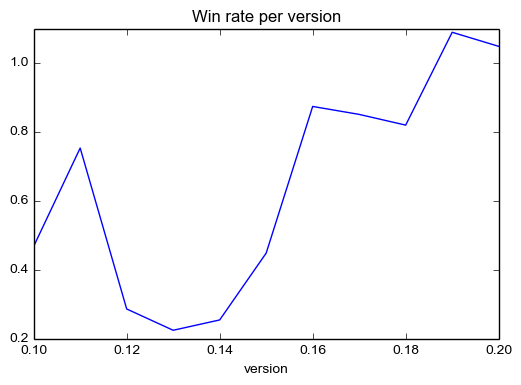

In [26]:
%matplotlib inline

print 'Overall average win rate: {:.2f}%'.format(f['won'].mean() * 100)

wr_per_version = f.groupby('version')['won'].mean() * 100
wr_per_version.plot(title='Win rate per version')

recent = f[f['version'] > .16]

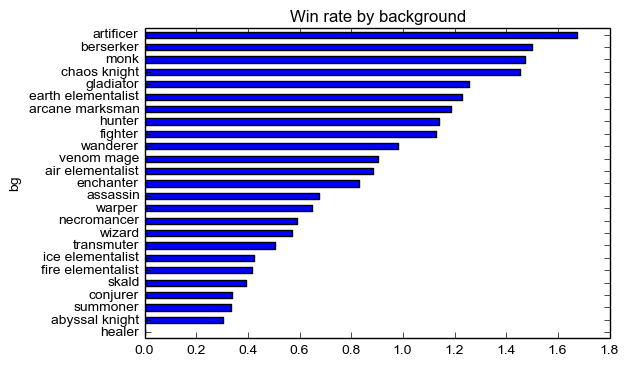

In [134]:
def plot_winrate(by_col, title=None):
    if title is None:
        title = 'Win rate by ' + by_col
    (recent.groupby(by_col)['won'].mean().dropna() * 100).sort_values().plot.barh(title=title)
# TODO: Would be kinda nice to colour or group bgs everywhere according to the 
# grouping in game in the character select screen (warriors, mages, warrior-mages, other)
# TODO: Also show pick rate in the same chart? stacked/side-by-side bars?
plot_winrate('bg', 'Win rate by background')

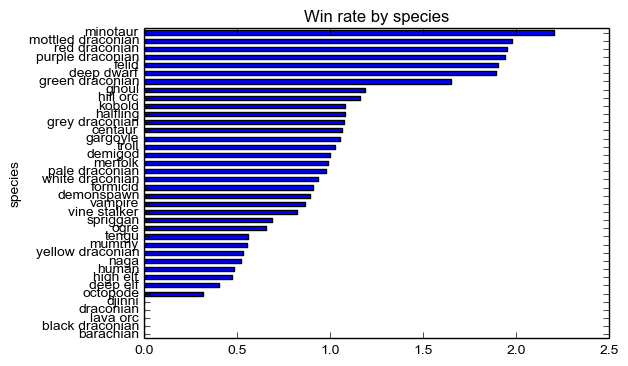

In [135]:
plot_winrate('species')

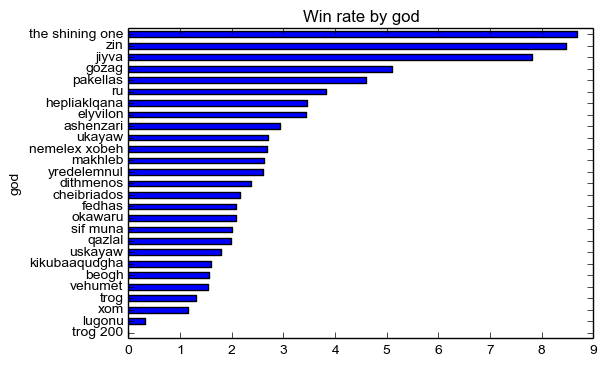

In [138]:
# TODO: replace nan's with actual category values so we can include atheists in the groupby
plot_winrate('god')
# TODO: filter by those who have seen the temple? (to avoid artificially low win rate for starter gods)

In [38]:
losers = recent[recent['won'] == False]


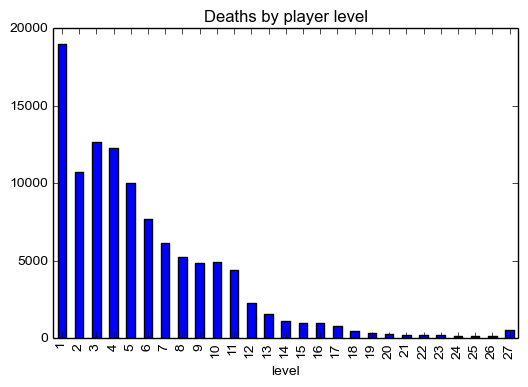

In [41]:
losers.groupby('level').size().plot.bar(title='Deaths by player level')
# Four distinct peaks! Cool

In [104]:
x = losers.groupby(['level', 'wheredied']).size().unstack()
x = x.div(x.sum(axis=1), axis=0)

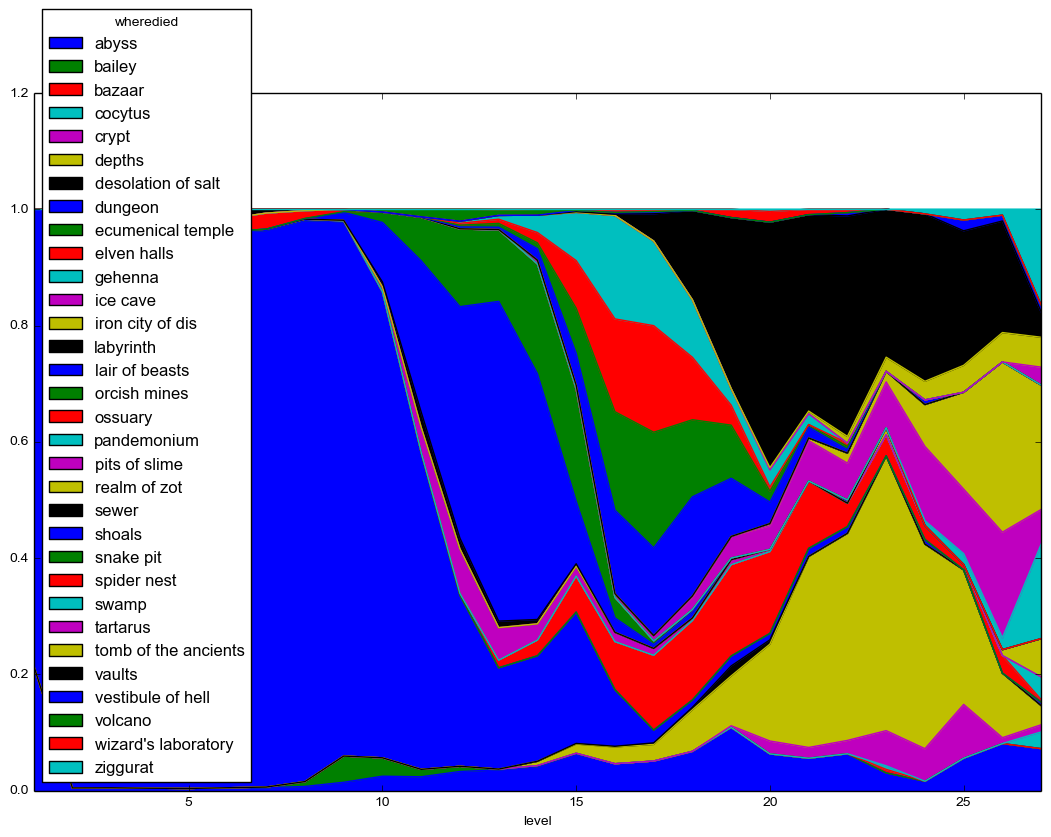

In [111]:
# That legend is crazy, and probably need to normalize, but this isn't half-bad
x.plot.area(figsize=(13,9), stacked=True, legend=1)

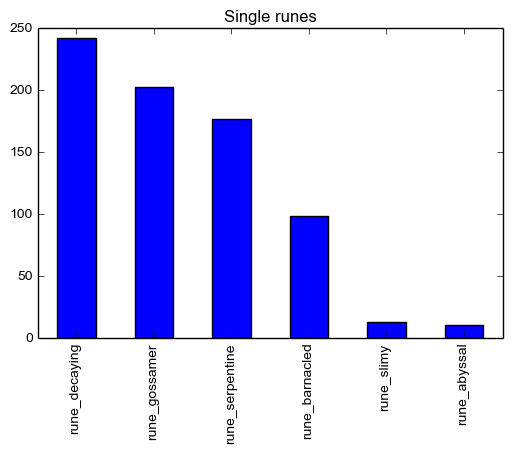

In [131]:
def n_runers(n):
    return recent[recent['nrunes'] == n]

rune_columns = [col for col in f.columns if col.startswith('rune_')]
# TODO: would be more interesting (or at least more principled) to track *first* runes
# (thus including runs that went on to get more than 1 rune). Need to parse the notes.
n_runers(1)[rune_columns].sum().where(lambda x: x > 0).dropna().sort_values(ascending=False).plot.bar(title="Single runes")

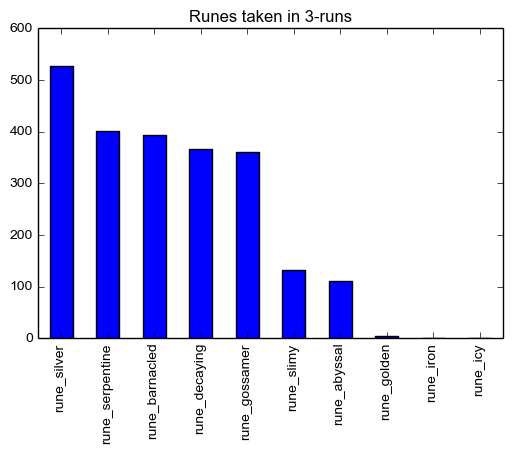

In [130]:
n_runers(3)[rune_columns].sum().where(lambda x: x > 0).dropna().sort_values(ascending=False).plot.bar(title="Runes taken in 3-runs")

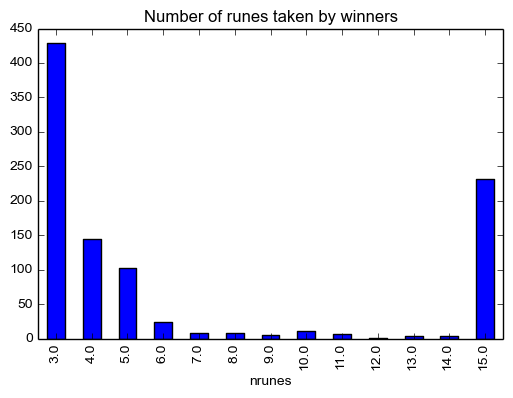

In [141]:
recent[recent['won'] == True].groupby('nrunes').size().plot.bar(title='Number of runes taken by winners')